# SMS Spam  / Natural Language Processing
## (Self-Guided Project)

## by Justin Sierchio

In this project, we will be looking at using SMS spam to learn about natural language processing.

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/ravichaubey1506/natural-language-processing-with-python. More information related to the dataset can be found at the same link.

Note: this is a self-guided project following the tutorial provided by Ravi Chaubey at Kaggle (Birla Institue of Technology).

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
messages = pd.read_csv('spam.csv',encoding='latin1')

print('Dataset loaded into workspace!')

Dataset loaded into workspace!


In [3]:
# Find the columns 'label' and 'message' and display the 1st 5 rows of the dataset
messages = messages.iloc[:,[0,1]]
messages.columns = ["label", "message"]
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

To begin, let's look at some of the basic level statistics for this dataset.

In [4]:
# Display basic level statistics in the Spam dataset
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In order to begin separating the messages into those that are relevant (ham) and those that are junk (spam), we can group the messages by label.

In [5]:
# Display messages by type of label
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Now we will create a new column to measure how long the text messages are.

In [6]:
# Create a new text message length column for the Spam dataset
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Initial Data Visualization

Let's visualize the length distribution for the different text messages.

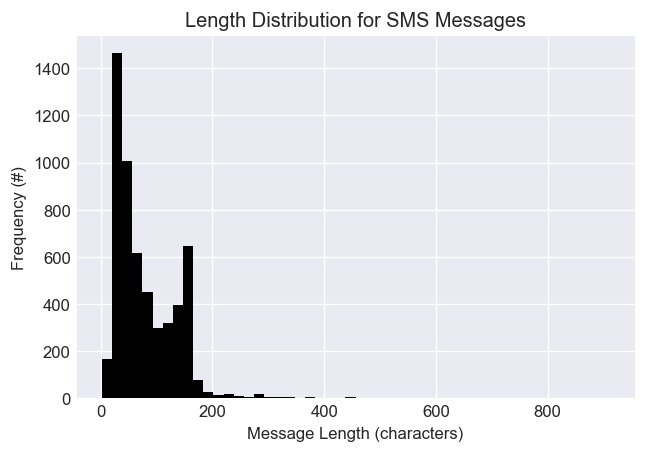

In [7]:
# Visualize the text message length distribution
plt.style.use('seaborn-darkgrid')

fig = plt.figure(dpi = 120)
ax = plt.axes()
messages['length'].plot(bins=50, kind='hist',ax=ax,color = 'black')
ax.set(xlabel = 'Message Length (characters)',ylabel = 'Frequency (#)',title = 'Length Distribution for SMS Messages');

As we can see, the majority of the messages are between 0 to 200 characters. Let's see if we can tell the difference between the "ham" and "spam."

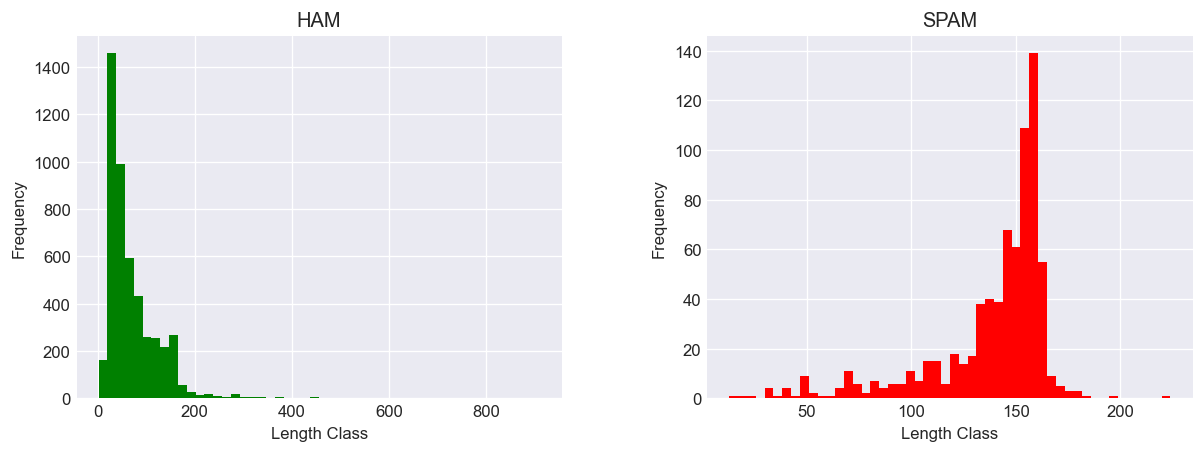

In [8]:
# Plot the distributions between "ham" and "spam"
fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

messages[messages['label']=='ham'].hist(column='length', bins=50,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'Length Class',ylabel = 'Frequency',title = 'HAM')
messages[messages['label']=='spam'].hist(column='length', bins=50,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'Length Class',ylabel = 'Frequency',title = 'SPAM');

## Preprocessing

In order to simplify the classification algorithms, let us convert each of the words into a number. First, let us import the necessary libraries.

As we can see, there is a distinct difference in the distribution between "ham" (around 50-100 characters) as compared to "spam" (around 125-160 characters).

In [9]:
import nltk
from nltk.corpus import stopwords
import string

The next step is to use tokenization to convert the text strings into a list of words. A function to perform such a function is shown below, followed by an example of an operation on one column of our dataset.

In [10]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [11]:
# One-Column Token routine check
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Vectorization

Next, we want to turn the tokens we have into a vector. This will allow us to use Sci-Kit Learn to ultimately detemrine the frequency of certain words so we can train our model to determine their presence (and hence figure out of the message is spam or not).

First, let's import the needed libraries from Sci-Kit Learn.

In [12]:
# Import needed libraries
from sklearn.feature_extraction.text import CountVectorizer

Now we will apply the CountVectorizer on our SMS message dataset.

In [13]:
# Apply the CountVectorizer to our SMS dataset
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11304


Here is an example of that task with one of the messages.

In [14]:
# Display one of the original messages
message12 = messages['message'][11]
print(message12)

SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info


Now let's apply the transformer onto this message.

In [16]:
# Apply the transformer to the selected message and display the result
bow12 = bow_transformer.transform([message12])
print(bow12)
print(bow12.shape)

  (0, 294)	1
  (0, 363)	1
  (0, 381)	1
  (0, 426)	1
  (0, 598)	1
  (0, 752)	1
  (0, 864)	1
  (0, 1333)	1
  (0, 1384)	1
  (0, 1502)	1
  (0, 2104)	1
  (0, 3353)	1
  (0, 3430)	1
  (0, 3976)	1
  (0, 4652)	1
  (0, 5328)	1
  (0, 7257)	1
  (0, 8867)	1
  (0, 9531)	1
  (0, 10570)	1
  (0, 10964)	1
(1, 11304)


According to this analysis, there are 21 unique words in this message, each of which appears only once.

Given this result, let's apply the transforme to the entire dataset.

In [17]:
# Apply the transformer to the entire message set
messages_bow = bow_transformer.transform(messages['message'])

# Display the shape the sparse matrix and the # of non-zero occurrences
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11304)
Amount of Non-Zero occurences:  50193


Finally, let's print out the sparsity values.

In [18]:
# Print out sparsity values
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0
